# linaer Regression with regularizaters

In [143]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [144]:
auto_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data', delim_whitespace=True, index_col=False, header=None)
 
auto_data.head()

,0,1,2,3,4,5,6,7,8
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [145]:
auto_data.shape

(398, 9)

In [146]:

import urllib.request  #this package is useful for accessing text files over internet 
auto_mpg_data_description_file = urllib.request.urlopen('https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.names')


for line in auto_mpg_data_description_file:
  decoded_line = line.decode("utf-8")
  print(decoded_line) 

1. Title: Auto-Mpg Data



2. Sources:

   (a) Origin:  This dataset was taken from the StatLib library which is

                maintained at Carnegie Mellon University. The dataset was 

                used in the 1983 American Statistical Association Exposition.

   (c) Date: July 7, 1993



3. Past Usage:

    -  See 2b (above)

    -  Quinlan,R. (1993). Combining Instance-Based and Model-Based Learning.

       In Proceedings on the Tenth International Conference of Machine 

       Learning, 236-243, University of Massachusetts, Amherst. Morgan

       Kaufmann.



4. Relevant Information:



   This dataset is a slightly modified version of the dataset provided in

   the StatLib library.  In line with the use by Ross Quinlan (1993) in

   predicting the attribute "mpg", 8 of the original instances were removed 

   because they had unknown values for the "mpg" attribute.  The original 

   dataset is available in the file "auto-mpg.data-original".



   "The data concerns cit

In [147]:

auto_data.columns = ['mpg', 'cylinders', 'displacement','horsepower', 'weight','acceleration','model year','origin','car name']


#check by printing the data again
auto_data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [148]:
auto_data.isnull()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
393,False,False,False,False,False,False,False,False,False
394,False,False,False,False,False,False,False,False,False
395,False,False,False,False,False,False,False,False,False
396,False,False,False,False,False,False,False,False,False


In [149]:
print(auto_data.isnull().sum())

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64


In [150]:
print(auto_data.nunique())

mpg             129
cylinders         5
displacement     82
horsepower       94
weight          351
acceleration     95
model year       13
origin            3
car name        305
dtype: int64


*Dropping the rows that contains "?" in the column "Horsepower"*

In [151]:
auto_data = auto_data.replace('?', np.nan)

In [152]:
print(auto_data.isnull().sum())

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64


In [153]:
auto_data = auto_data.dropna()
print(auto_data.isnull().sum())

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64


In [154]:
auto_data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.00,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.00,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.00,2625.0,18.6,82,1,ford ranger


In [155]:
auto_data.drop('car name', axis = 1, inplace=True)

In [156]:
auto_data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [157]:
auto_data.drop(['model year', 'origin'], axis=1, inplace=True)

In [158]:
auto_data.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight          float64
acceleration    float64
dtype: object

In [159]:
auto_data = auto_data.astype(float)

In [160]:
auto_data.dtypes

mpg             float64
cylinders       float64
displacement    float64
horsepower      float64
weight          float64
acceleration    float64
dtype: object

## Making a Train-Test-Validation split..

In [161]:
auto_data_train = auto_data.sample(frac=0.8, random_state=200)
auto_data_test = auto_data.drop(auto_data_train.index)

In [162]:
len(auto_data_train) , len(auto_data_test)

(314, 78)

In [163]:
auto_data_train_final = auto_data_train.sample(frac=0.8, random_state=200)
auto_data_val = auto_data_train.drop(auto_data_train_final.index)

In [164]:
len(auto_data_train_final),len(auto_data_val),len(auto_data_test)

(251, 63, 78)

## computing beta

In [165]:
n_train = len(auto_data_train_final)
n_val = len(auto_data_val)
n_test = len(auto_data_test)

In [166]:
cols = list(np.arange(1,6))

x_train = auto_data_train_final[auto_data_train_final.columns[cols]]
x_val = auto_data_val[auto_data_val.columns[cols]]
x_test = auto_data_test[auto_data_test.columns[cols]]

In [167]:
x_train

,cylinders,displacement,horsepower,weight,acceleration
28,8.0,304.0,193.0,4732.0,18.5
154,6.0,250.0,72.0,3432.0,21.0
337,4.0,107.0,72.0,2290.0,17.0
93,8.0,318.0,150.0,4237.0,14.5
109,4.0,140.0,72.0,2401.0,19.5
...,...,...,...,...,...
371,4.0,135.0,84.0,2525.0,16.0
12,8.0,400.0,150.0,3761.0,9.5
379,4.0,98.0,70.0,2125.0,17.3
199,6.0,225.0,100.0,3651.0,17.7


converting to numpy array

In [168]:
x_train = x_train.to_numpy()
x_test = x_test.to_numpy()
x_val = x_val.to_numpy()

adding collumn of one at last row

In [169]:
x_train = np.hstack((x_train, np.ones((x_train.shape[0],1), dtype=x_train.dtype)))

x_test = np.hstack((x_test, np.ones((x_test.shape[0], 1), dtype=x_test.dtype)))

x_val = np.hstack((x_val, np.ones((x_val.shape[0], 1), dtype=x_test.dtype)))


In [170]:
y_train = auto_data_train_final[auto_data_train_final.columns[0]].to_numpy()
y_test = auto_data_test[auto_data_test.columns[0]].to_numpy()
y_val = auto_data_val[auto_data_val.columns[0]].to_numpy()

In [171]:
XTX = np.matmul(np.transpose(x_train),x_train)

print('XTX', XTX.shape)

XTX (6, 6)


In [172]:
y_train.shape

(251,)

In [173]:
y_train = y_train.reshape(251,1)

In [174]:
XTY = np.matmul(np.transpose(x_train),y_train)
print('XTY',XTY.shape)

XTY (6, 1)


In [175]:
beta = np.linalg.solve(XTX,XTY)
print(beta)

[[-7.62518627e-01]
 [ 2.11672711e-03]
 [-6.05537356e-02]
 [-4.41112684e-03]
 [-3.73921880e-01]
 [ 5.22567833e+01]]


In [176]:
print(np.linalg.matrix_rank(XTX))

XTX_inv = np.linalg.inv(XTX)

is_identity = np.all(np.matmul(XTX,XTX_inv)==np.identity(XTX.shape[0]))
print(is_identity)

6
False


$\textbf{Note:}$ Because the matrix $X^\top X$ is full-rank, that is, $\text{rank}(X^\top X)=6$, we see that $\texttt{numpy}$ does not raise any error while computing the inverse of $X^\top X$. But, if it would have been not a full rank matrix, numpy might have raised an error. We will use $\texttt{scipy}$ to solve for $\beta$ and check if we get any error or not. 

In [177]:
import scipy.linalg
#Now we are ready for finding beta
#print('X shape:',X.shape,'y shape:',y.shape)

XTX = np.matmul(np.transpose(x_train),x_train)
#print('XTX shape:',XTX.shape)

XTY = np.matmul(np.transpose(x_train),y_train)
#print('Xy shape:',Xy.shape)

beta =scipy.linalg.solve(XTX,XTY)
#beta = np.matmul(scipy.linalg.inv(XTX),Xy)

In [178]:
beta

array([[-7.62518627e-01],
       [ 2.11672711e-03],
       [-6.05537356e-02],
       [-4.41112684e-03],
       [-3.73921880e-01],
       [ 5.22567833e+01]])

In [179]:
print(np.linalg.cond(XTX))

1419028386.6829646


We can see that the ill-conditioning of $X^\top X$ might lead to wild changes in solutions of linear regression parameters, even for small changes in the output $\mathbf{y}$. 

With $\lambda \in \{0, 10^{-5},10^{-4}, 10^{-3},10^{-2},0.1, 1, 10, 100, 1000, 10000\}$ let us check the condition number of $(X^\top X+\lambda I)$. 

In [180]:
lambdas = np.array([0,1e-5,1e-4,1e-3,1e-2,1e-1,1,10,100,1000,10000])
I = np.identity(XTX.shape[0])

for lambda_ in lambdas:
  print('lambda:',lambda_,'cond(XTX+lambda I):', np.linalg.cond(XTX+lambda_*I))

lambda: 0.0 cond(XTX+lambda I): 1419028386.6829646
lambda: 1e-05 cond(XTX+lambda I): 1419020062.6554148
lambda: 0.0001 cond(XTX+lambda I): 1418945150.5655844
lambda: 0.001 cond(XTX+lambda I): 1418196464.4657183
lambda: 0.01 cond(XTX+lambda I): 1410752829.3206525
lambda: 0.1 cond(XTX+lambda I): 1340399764.1572118
lambda: 1.0 cond(XTX+lambda I): 894379952.8491508
lambda: 10.0 cond(XTX+lambda I): 206672951.13640776
lambda: 100.0 cond(XTX+lambda I): 23785027.4660599
lambda: 1000.0 cond(XTX+lambda I): 2414933.724689472
lambda: 10000.0 cond(XTX+lambda I): 241864.72041580544


In [181]:
I = np.identity(XTX.shape[0])
print(I.shape)
print(XTX.shape[0])

(6, 6)
6


In [182]:
betas = []

for lambda_ in lambdas:
    beta = scipy.linalg.solve(XTX + lambda_ * I, XTY)
    print('lambda', lambda_)
    print('beta', beta)
    print("********************")
    betas.append(beta.reshape(6,1))

lambda 0.0
beta [[-7.62518627e-01]
 [ 2.11672711e-03]
 [-6.05537356e-02]
 [-4.41112684e-03]
 [-3.73921880e-01]
 [ 5.22567833e+01]]
********************
lambda 1e-05
beta [[-7.62498652e-01]
 [ 2.11636006e-03]
 [-6.05526317e-02]
 [-4.41114136e-03]
 [-3.73909414e-01]
 [ 5.22564782e+01]]
********************
lambda 0.0001
beta [[-7.62318892e-01]
 [ 2.11305684e-03]
 [-6.05426971e-02]
 [-4.41127199e-03]
 [-3.73797229e-01]
 [ 5.22537326e+01]]
********************
lambda 0.001
beta [[-7.60522352e-01]
 [ 2.08004399e-03]
 [-6.04434081e-02]
 [-4.41257757e-03]
 [-3.72676022e-01]
 [ 5.22262923e+01]]
********************
lambda 0.01
beta [[-7.42662253e-01]
 [ 1.75184078e-03]
 [-5.94562431e-02]
 [-4.42555720e-03]
 [-3.61528569e-01]
 [ 5.19534739e+01]]
********************
lambda 0.1
beta [[-5.74008595e-01]
 [-1.34832630e-03]
 [-5.01253813e-02]
 [-4.54816018e-03]
 [-2.56157419e-01]
 [ 4.93749382e+01]]
********************
lambda 1.0
beta [[ 4.85325902e-01]
 [-2.08824238e-02]
 [ 9.07797377e-03]
 [-5.32

$\Large{\text{Residual Plot}}$

Sometimes it would be useful to plot the error (or) $\textbf{residual}$ $e^i$ versus the fitted values $\hat{y}^i=\beta_0 + \sum_{j=1}^{d} \beta_j x^i_j$.  

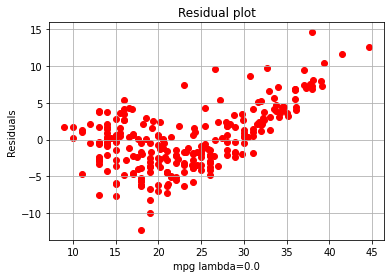

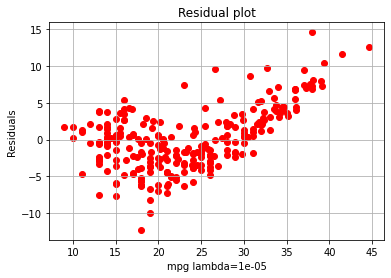

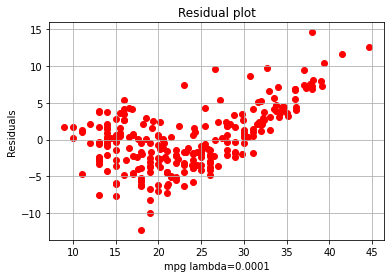

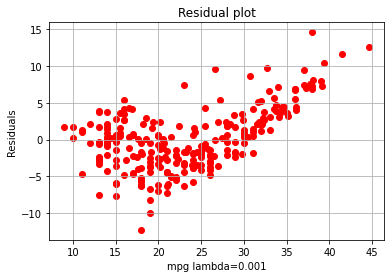

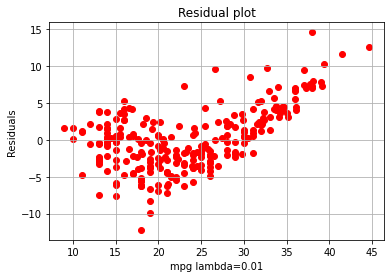

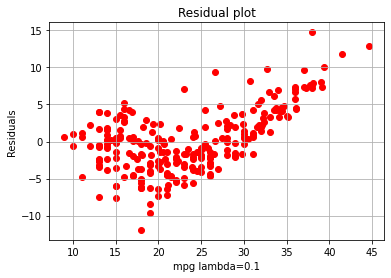

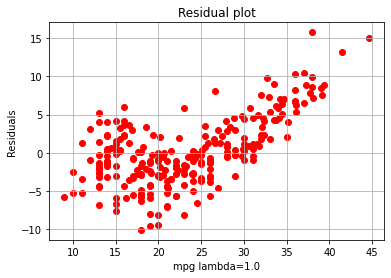

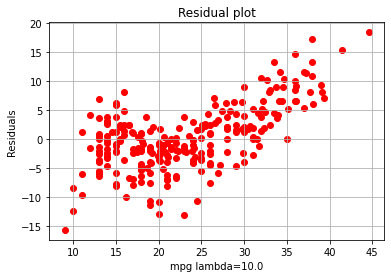

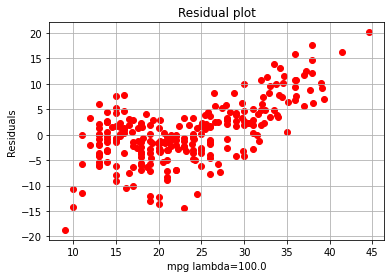

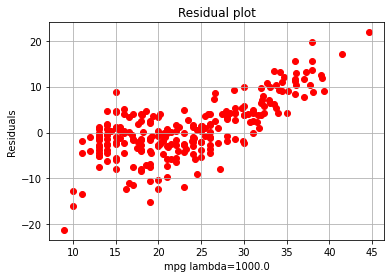

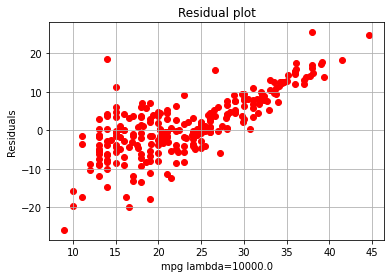

In [183]:
beta_idx = 0

for lambda_ in lambdas:
    beta = betas[beta_idx]
    beta_idx += 1

    e_i_residual_list = []
    xlabel = 'mpg lambda='+str(lambda_)


    for i in range(n_train):

        x_i = x_train[i,:]
        y_i = y_train[i]

        y_pred_i = np.dot(x_i, beta)
        e_i = y_i - y_pred_i

        e_i_residual_list.append(e_i)
    
    plt.scatter(auto_data_train_final['mpg'], e_i_residual_list, color = 'r')
    plt.title("Residual plot")
    plt.xlabel(xlabel)
    plt.ylabel("Residuals")
    plt.grid()
    plt.show()

$\Large{\text{Coefficient of multiple determination for high dimensions}}$ 


In [184]:
R_sq_train = []
R_sq_val = []
MSE_train = []
MSE_val = []

y_bar

In [185]:
y_bar_train=0
for i in range(n_train):
    y_i_train = float(auto_data_train_final.iat[i,0])
    y_bar_train += y_i_train
y_bar_train /= n_train

print(y_bar_train)
print(y_train.mean())


23.18366533864542
23.18366533864542


y_bar_val

In [186]:
y_bar_val = 0

for i in range(n_val):
    y_i = float(auto_data_val.iat[i,0])
    y_bar_val += y_i
y_bar_val /= n_val

print(y_bar_val)
print(y_val.mean())

23.05714285714286
23.05714285714286


In [187]:
sigma_yy_train = 0
for i in range(n_train): #access each row from the data set 
  y_i_train = float(auto_data_train_final.iat[i,0]) #access element at mpg column
  sigma_yy_train += (y_i_train-y_bar_train)**2

print('sigma_yy_train:', sigma_yy_train)

sigma_yy_train: 14573.343027888452


In [188]:
sigma_yy_val = 0
for i in range(n_val): #access each row from the data set 
  y_i_val = float(auto_data_val.iat[i,0]) #access element at mpg column
  sigma_yy_val += (y_i_val-y_bar_val)**2

print('sigma_yy_val:', sigma_yy_val)

sigma_yy_val: 4289.494285714284


In [189]:
beta_idx = 0

for lambda_ in lambdas:
    beta = betas[beta_idx]
    beta_idx += 1

    sum_sq_residual_train = 0
    sum_sq_residual_val = 0

    for i in range(n_train):
        x_i_train = x_train[i,:]
        y_i_train = y_train[i]

        y_pred_i_train = np.dot(x_i_train,beta)
        e_i_train = y_i_train - y_pred_i_train

        sum_sq_residual_train += (e_i_train)**2
    
    for i in range(n_val):
        x_i_val = x_val[i,:]
        y_i_val = y_val[i]

        y_i_pred_val = np.dot(x_i_val,beta)
        e_i_val = y_i_val - y_i_pred_val

        sum_sq_residual_val += (e_i_val)**2
    
    print('lambda:',lambda_)
    print('sum of squared residuals for training data:', sum_sq_residual_train)
    MSE_train.append(sum_sq_residual_train/n_train)
    #Then we will compute the R^2 quantity
    R_sq = 1-(sum_sq_residual_train/sigma_yy_train)
    R_sq_train.append(R_sq)
    print('R^2 for training data:',R_sq)

    print('sum of squared residuals for validation data:', sum_sq_residual_val)
    MSE_val.append(sum_sq_residual_val/n_val)

    #Then we will compute the R^2 quantity
    R_sq_vali = 1-sum_sq_residual_val/sigma_yy_val
    R_sq_val.append(R_sq_vali)
    print('R^2 for validation data:',R_sq_vali)
    print('\n*******************************************************************\n') 

lambda: 0.0
sum of squared residuals for training data: [4326.9049026]
R^2 for training data: [0.70309455]
sum of squared residuals for validation data: [1383.02097441]
R^2 for validation data: [0.67757948]

*******************************************************************

lambda: 1e-05
sum of squared residuals for training data: [4326.90490275]
R^2 for training data: [0.70309455]
sum of squared residuals for validation data: [1383.01759436]
R^2 for validation data: [0.67758027]

*******************************************************************

lambda: 0.0001
sum of squared residuals for training data: [4326.90491856]
R^2 for training data: [0.70309455]
sum of squared residuals for validation data: [1382.98717802]
R^2 for validation data: [0.67758736]

*******************************************************************

lambda: 0.001
sum of squared residuals for training data: [4326.90649701]
R^2 for training data: [0.70309445]
sum of squared residuals for validation data: [1382.

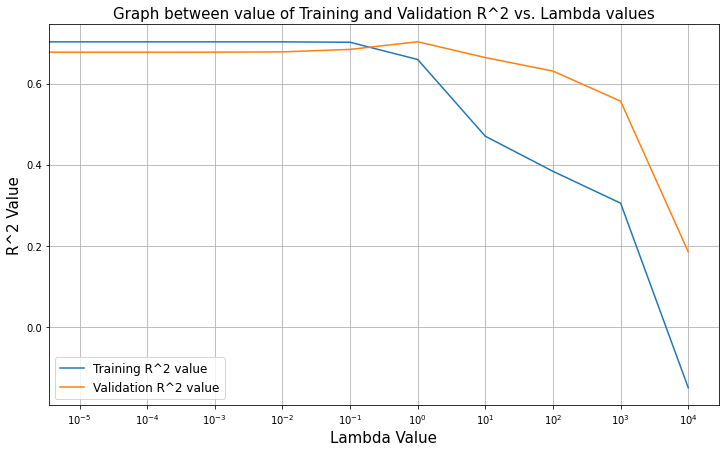

In [190]:
plt.figure(figsize =(12,7))
plt.plot(lambdas,R_sq_train,label = "Training R^2 value")
plt.plot(lambdas,R_sq_val,label = "Validation R^2 value")
plt.ylabel("R^2 Value",fontsize = 15)
plt.xlabel("Lambda Value",fontsize = 15)
plt.xscale('log')
plt.xticks([1e-5,1e-4,1e-3,1e-2,1e-1,1,10,100,1000,10000])
plt.legend(fontsize = 12,loc = "best")
plt.title("Graph between value of Training and Validation R^2 vs. Lambda values",fontsize = 15)
plt.grid()
plt.show()

**Graph between $MSE$ and $λ$ values for training and validation data-**

In [191]:
MSE_train

[array([17.23866495]),
 array([17.23866495]),
 array([17.23866501]),
 array([17.2386713]),
 array([17.23929353]),
 array([17.2954099]),
 array([19.76523742]),
 array([30.75367912]),
 array([35.77908989]),
 array([40.33979522]),
 array([66.76535766])]

In [192]:
MSE_val

[array([21.95271388]),
 array([21.95266023]),
 array([21.95217743]),
 array([21.9473559]),
 array([21.89978031]),
 array([21.4825568]),
 array([20.20204864]),
 array([22.85243588]),
 array([25.12588492]),
 array([30.17992329]),
 array([55.47344764])]

**Graph between $MSE$ and $λ$ values for training and validation data-**

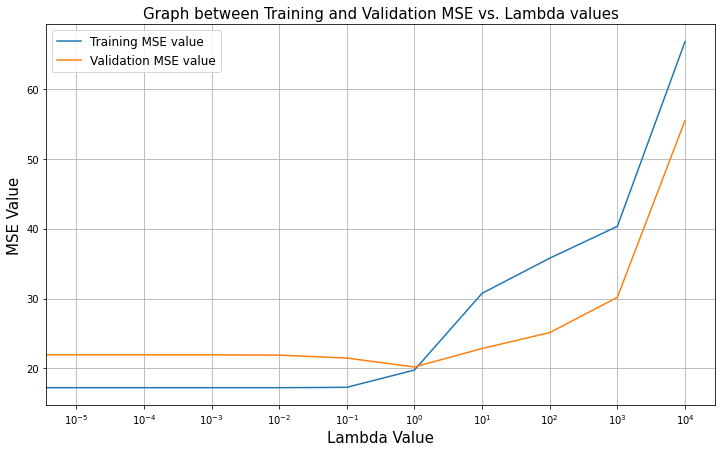

In [193]:
plt.figure(figsize =(12,7))
plt.plot(lambdas,MSE_train,label = "Training MSE value")
plt.plot(lambdas,MSE_val,label = "Validation MSE value")
plt.ylabel("MSE Value",fontsize = 15)
plt.xlabel("Lambda Value",fontsize = 15)
plt.xscale("log")
plt.xticks([1e-5,1e-4,1e-3,1e-2,1e-1,1,10,100,1000,10000])
plt.legend(fontsize = 12,loc = "best")
plt.title("Graph between Training and Validation MSE vs. Lambda values",fontsize = 15)
plt.grid()
plt.show()

As we can see, increasing the value of $\lambda$ leads to lower $R^2$ values which indicates that the unexplained variations captured by the regression parameters is not significant when compared to the variations captured by the mean $\bar{\mathbf{y}}$. 

Also note that increasing $\lambda$ leads to residual plots where the variance in the predicted values become smaller and smaller when compared to lower values of $\lambda$. However it might turn out that on an average, the estimated parameters might be away from the actual parameters which were possibly responsible for the data. This leads to a larger bias in the estimated model parameters. This phenomenon is one explanation for the popular $\textbf{bias-variance}$ tradeoff.

# **Doing K-Fold Cross Validatiion-**

In [194]:
def compute_Rq_and_MSE(data,beta, x, y):

    # compute y_bar

    y_bar = 0
    n = len(data)
    for i in range(n):
        y_i = float(data.iat[i,0])
        y_bar += y_i
    
    y_bar /= n

    sigma_yy = 0

    for i in range(n):
        y_i = float(data.iat[i,0])
        sigma_yy += (y_i - y_bar)**2
    
    sum_sq_residuals = 0

    for i in range(n):
        x_i = x[i,:]
        y_i = y[i]

        y_pred_i = np.dot(x_i,beta)
        e_i = y_i - y_pred_i

        sum_sq_residuals += (e_i)**2
    
    R_sq = 1-(sum_sq_residuals/sigma_yy)
    MSE = sum_sq_residuals/n

    print('R^2' , R_sq, 'MSE: ', MSE )
    return R_sq, MSE



In [195]:
seed = 2000

auto_data_train = auto_data.sample(frac=0.8, random_state=seed)
auto_data_test = auto_data.drop(auto_data_train.index)


In [196]:
seeds = [100,200,300,400,500]

lambdas = [1e-5, 1e-4, 1e-3, 1e-2, 0.1, 1,10,100,1000, 10000]

train_R2_seeds = []
val_R2_seeds = []

train_MSE_seed = []
val_MSE_seeds = []

cols = list(np.arange(1,6))
respose_col = [0]


In [197]:
for seed in seeds:

    auto_data_train_final = auto_data_train.sample(frac=0.8, random_state=seed)
    auto_data_val = auto_data_train.drop(auto_data_train_final.index)

    x_train = auto_data_train_final[auto_data_train_final.columns[cols]].to_numpy()
    x_val = auto_data_val[auto_data_val.columns[cols]].to_numpy()

    x_train = np.hstack((x_train , np.ones((x_train.shape[0],1), dtype=x_train.dtype)))
    x_val = np.hstack((x_val, np.ones((x_val.shape[0], 1), dtype=x_val.dtype)))

    y_train = auto_data_train_final[auto_data_train_final.columns[respose_col]].to_numpy()
    y_val = auto_data_val[auto_data_val.columns[respose_col]].to_numpy()


    train_R2_lambdas = []
    val_R2_lambdas = []

    train_MSE_lambdas = []
    val_MSE_lambdas = []

    for lambda_ in lambdas:

        XTX = np.matmul(np.transpose(x_train),x_train)
        XTY = np.matmul(np.transpose(x_train),y_train)
        I = np.identity(x_train.shape[1])

        beta = scipy.linalg.solve(XTX + lambda_*I , XTY)
        print('lambda: ', lambda_)
        print('beta :', beta)
        print("***********************")

        train_R2, train_MSE = compute_Rq_and_MSE(auto_data_train_final, beta, x_train, y_train)
        train_R2_lambdas.append(train_R2)
        train_MSE_lambdas.append(train_MSE)

        val_R2, val_MSE = compute_Rq_and_MSE(auto_data_val,beta,x_val,y_val)
        val_R2_lambdas.append(val_R2)
        val_MSE_lambdas.append(val_MSE)

    train_R2_seeds.append(np.array(train_R2_lambdas))
    train_MSE_seed.append(np.array(train_MSE_lambdas))

    val_R2_seeds.append(np.array(val_R2_lambdas))
    val_MSE_seeds.append(np.array(val_MSE_lambdas))


lambda:  1e-05
beta : [[-3.68664310e-01]
 [-1.66164986e-03]
 [-3.38968831e-02]
 [-5.42672414e-03]
 [-1.27507010e-02]
 [ 4.58348983e+01]]
***********************
R^2 [0.711848] MSE:  [18.11663619]
R^2 [0.65712488] MSE:  [19.9750094]
lambda:  0.0001
beta : [[-3.68521409e-01]
 [-1.66512680e-03]
 [-3.38872420e-02]
 [-5.42676586e-03]
 [-1.26543449e-02]
 [ 4.58324005e+01]]
***********************
R^2 [0.711848] MSE:  [18.11663624]
R^2 [0.65712653] MSE:  [19.97491359]
lambda:  0.001
beta : [[-3.67093273e-01]
 [-1.69987511e-03]
 [-3.37908887e-02]
 [-5.42718270e-03]
 [-1.16913619e-02]
 [ 4.58074378e+01]]
***********************
R^2 [0.71184792] MSE:  [18.11664125]
R^2 [0.6571429] MSE:  [19.97395985]
lambda:  0.01
beta : [[-3.52898731e-01]
 [-2.04526401e-03]
 [-3.28331143e-02]
 [-5.43132555e-03]
 [-2.11905326e-03]
 [ 4.55593046e+01]]
***********************
R^2 [0.71184003] MSE:  [18.11713715]
R^2 [0.65729925] MSE:  [19.96485145]
lambda:  0.1
beta : [[-2.19138004e-01]
 [-5.30172675e-03]
 [-2.379

In [198]:
val_R2_seeds

[array([[ 0.65712488],
        [ 0.65712653],
        [ 0.6571429 ],
        [ 0.65729925],
        [ 0.6582032 ],
        [ 0.640404  ],
        [ 0.53656606],
        [ 0.4756591 ],
        [ 0.35742068],
        [-0.15408239]]),
 array([[ 0.70049831],
        [ 0.70049877],
        [ 0.7005033 ],
        [ 0.70054272],
        [ 0.70040852],
        [ 0.67846464],
        [ 0.57647707],
        [ 0.53544618],
        [ 0.44924064],
        [-0.0693571 ]]),
 array([[ 0.65555856],
        [ 0.65555748],
        [ 0.65554664],
        [ 0.6554333 ],
        [ 0.65386335],
        [ 0.62332074],
        [ 0.50909755],
        [ 0.45639846],
        [ 0.38561377],
        [-0.02609927]]),
 array([[ 0.69500438],
        [ 0.69500615],
        [ 0.69502373],
        [ 0.69519174],
        [ 0.69616674],
        [ 0.67734441],
        [ 0.56866383],
        [ 0.51186263],
        [ 0.43268741],
        [-0.00586951]]),
 array([[ 0.66309603],
        [ 0.66309725],
        [ 0.66310926],
   

In [199]:
val_R2_seeds = np.array(val_R2_seeds).squeeze()
print(val_R2_seeds)

[[ 0.65712488  0.65712653  0.6571429   0.65729925  0.6582032   0.640404
   0.53656606  0.4756591   0.35742068 -0.15408239]
 [ 0.70049831  0.70049877  0.7005033   0.70054272  0.70040852  0.67846464
   0.57647707  0.53544618  0.44924064 -0.0693571 ]
 [ 0.65555856  0.65555748  0.65554664  0.6554333   0.65386335  0.62332074
   0.50909755  0.45639846  0.38561377 -0.02609927]
 [ 0.69500438  0.69500615  0.69502373  0.69519174  0.69616674  0.67734441
   0.56866383  0.51186263  0.43268741 -0.00586951]
 [ 0.66309603  0.66309725  0.66310926  0.66321559  0.66306738  0.62009602
   0.45176606  0.38699417  0.29921194 -0.16827989]]


In [200]:
mean_val_R2_lambdas =  np.mean(val_R2_seeds, axis=0)
mean_val_R2_lambdas

array([ 0.67425643,  0.67425723,  0.67426517,  0.67433652,  0.67434184,
        0.64792596,  0.52851411,  0.47327211,  0.38483489, -0.08473763])

In [201]:
train_R2_seeds = np.array(train_R2_seeds).squeeze()
print(train_R2_seeds)

[[ 0.711848    0.711848    0.71184792  0.71184003  0.7111313   0.68066052
   0.55075474  0.49317547  0.43062774  0.0184565 ]
 [ 0.69895072  0.69895072  0.69895065  0.69894315  0.69826798  0.6687779
   0.53932964  0.47887747  0.41110639 -0.01197032]
 [ 0.71400968  0.71400968  0.7140096   0.71400208  0.7133257   0.68405146
   0.55771688  0.50039384  0.43378716 -0.00504909]
 [ 0.70269273  0.70269272  0.70269264  0.70268471  0.70197255  0.67147868
   0.54241146  0.48521472  0.42048675 -0.01169601]
 [ 0.71011805  0.71011805  0.71011796  0.71010858  0.70927961  0.67704731
   0.56132636  0.51226731  0.44342444  0.00889452]]


In [202]:
mean_train_R2_lambdas = np.mean(train_R2_seeds,axis=0)
print(mean_train_R2_lambdas)

[ 7.07523837e-01  7.07523836e-01  7.07523755e-01  7.07515713e-01
  7.06795429e-01  6.76403176e-01  5.50307816e-01  4.93985764e-01
  4.27886494e-01 -2.72882700e-04]


In [203]:
print('k-fold val R2 values:', mean_val_R2_lambdas.squeeze())
print('k-fold train R2 values:', mean_train_R2_lambdas.squeeze())

k-fold val R2 values: [ 0.67425643  0.67425723  0.67426517  0.67433652  0.67434184  0.64792596
  0.52851411  0.47327211  0.38483489 -0.08473763]
k-fold train R2 values: [ 7.07523837e-01  7.07523836e-01  7.07523755e-01  7.07515713e-01
  7.06795429e-01  6.76403176e-01  5.50307816e-01  4.93985764e-01
  4.27886494e-01 -2.72882700e-04]


In [204]:
best_lambda_idx = np.argmax(mean_val_R2_lambdas)
best_lambda = lambdas[best_lambda_idx]

In [205]:
print('best lambda:', best_lambda)

best lambda: 0.1


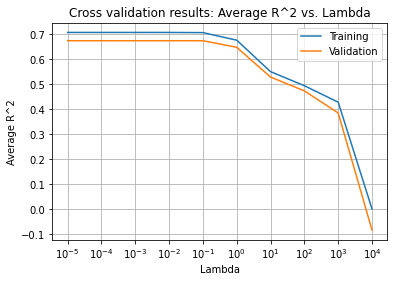

In [206]:
plt.plot(lambdas, mean_train_R2_lambdas,label = "Training")
plt.plot(lambdas, mean_val_R2_lambdas,label = "Validation")
plt.xscale('log')
plt.title('Cross validation results: Average R^2 vs. Lambda')
plt.ylabel('Average R^2')
plt.xlabel('Lambda')
plt.xticks([1e-5,1e-4,1e-3,1e-2,1e-1,1,10,100,1000,10000])
plt.grid()
plt.legend()
plt.show()
     

In [208]:
x_train = auto_data_train[auto_data_train.columns[cols]]
x_train = x_train.to_numpy()

x_train = np.hstack((x_train, np.ones((x_train.shape[0],1), dtype=x_train.dtype)))
y_train = auto_data_train[auto_data_train.columns[respose_col]].to_numpy()



In [209]:
x_test = auto_data_test[auto_data_test.columns[cols]].to_numpy()
x_test = np.hstack((x_test, np.ones((x_test.shape[0],1), dtype=x_test.dtype)))

y_test = auto_data_test[auto_data_test.columns[respose_col]].to_numpy()


In [212]:
XTX = np.matmul(np.transpose(x_train),x_train)
XTY = np.matmul(np.transpose(x_train),y_train)

I = np.identity(x_train.shape[1])

beta = scipy.linalg.solve(XTX + best_lambda*I ,XTY)


In [213]:
print('lambda:',best_lambda)
print('Final beta:',beta)
print('***************')

lambda: 0.1
Final beta: [[-2.10216193e-01]
 [ 1.34714111e-03]
 [-3.08104376e-02]
 [-5.98765935e-03]
 [ 1.52628888e-01]
 [ 4.31287792e+01]]
***************


In [214]:
train_R2, train_MSE = compute_Rq_and_MSE(auto_data_train, beta, x_train,y_train)
test_R2, test_MSE = compute_Rq_and_MSE(auto_data_test, beta,x_test, y_test)

print('Train R^2 :', train_R2, ' Train MSE:', train_MSE)
print('Test R^2 :', test_R2, ' Test MSE:', test_MSE)

R^2 [0.70244902] MSE:  [18.43829934]
R^2 [0.71894723] MSE:  [15.6605302]
Train R^2 : [0.70244902]  Train MSE: [18.43829934]
Test R^2 : [0.71894723]  Test MSE: [15.6605302]


Checking performance on test datset-

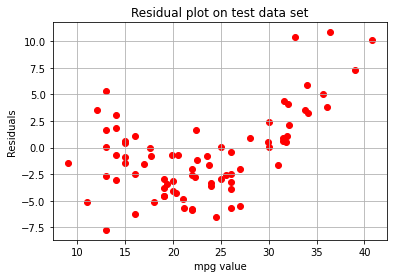

In [215]:
e_i_residual_list = []

n = len(auto_data_test.index)

for i in range(n):
    x_i = x_test[i,:]
    y_i = y_test[i]

    y_pred_i = np.dot(x_i, beta)
    e_i = y_i - y_pred_i

    e_i_residual_list.append(e_i)

plt.scatter(auto_data_test['mpg'], e_i_residual_list,color='r')
plt.title("Residual plot on test data set")
plt.xlabel("mpg value")
plt.ylabel("Residuals")
plt.grid()
plt.show()

In [219]:
print('Peformance on test data:')

y_bar = np.mean(y_test)
print('y_bar' , y_bar)

sigma_yy = 0

for i in range(n):
    y_i = float(auto_data_test.iat[i,0])
    sigma_yy += (y_i - y_bar)**2

print('sigma_yy', sigma_yy)

sum_sq_residual = 0

for i in range(n):
    x_i = x_test[i,:]
    y_i = y_test[i]

    y_pred_i = np.dot(x_i,beta)
    e_i = y_i - y_pred_i

    sum_sq_residual += (e_i)**2

print('lambda:',best_lambda)
print('sum of squared residuals:', sum_sq_residual)

#Then we will compute the R^2 quantity
R_sq = 1-sum_sq_residual/sigma_yy
print('R^2:',R_sq)
print('*********************')

Peformance on test data:
y_bar 23.05128205128205
sigma_yy 4346.2348717948735
lambda: 0.1
sum of squared residuals: [1221.52135587]
R^2: [0.71894723]
*********************
